In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import random
from sklearn import utils
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# traces - массив размера 3768, 1000
# Где 1000 - длина одной трассы, 3768 - количество трасс
# picks - массив 1д размера 3768
# внутри picks лежат времена пиков в мс для каждой трассы
# шаг дескритизации по времени - 1мс
# Поэтому вам нужно будет из float пики перевести в int
# советую это с помощью np.ceil сделать
# подгрузка данных с помощью numpy.load("filename.npy")

# from sklearn.cross_validation import train_test_split
# # split the data with 50% in each set
# X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
#                                   train_size=0.5)

In [ ]:
trace = np.load('/content/drive/MyDrive/traces.npy')
picks = np.load('/content/drive/MyDrive/picks.npy')
y_train = np.ceil(picks)
trace.shape, y_train.shape

((3768, 1000), (3768,))

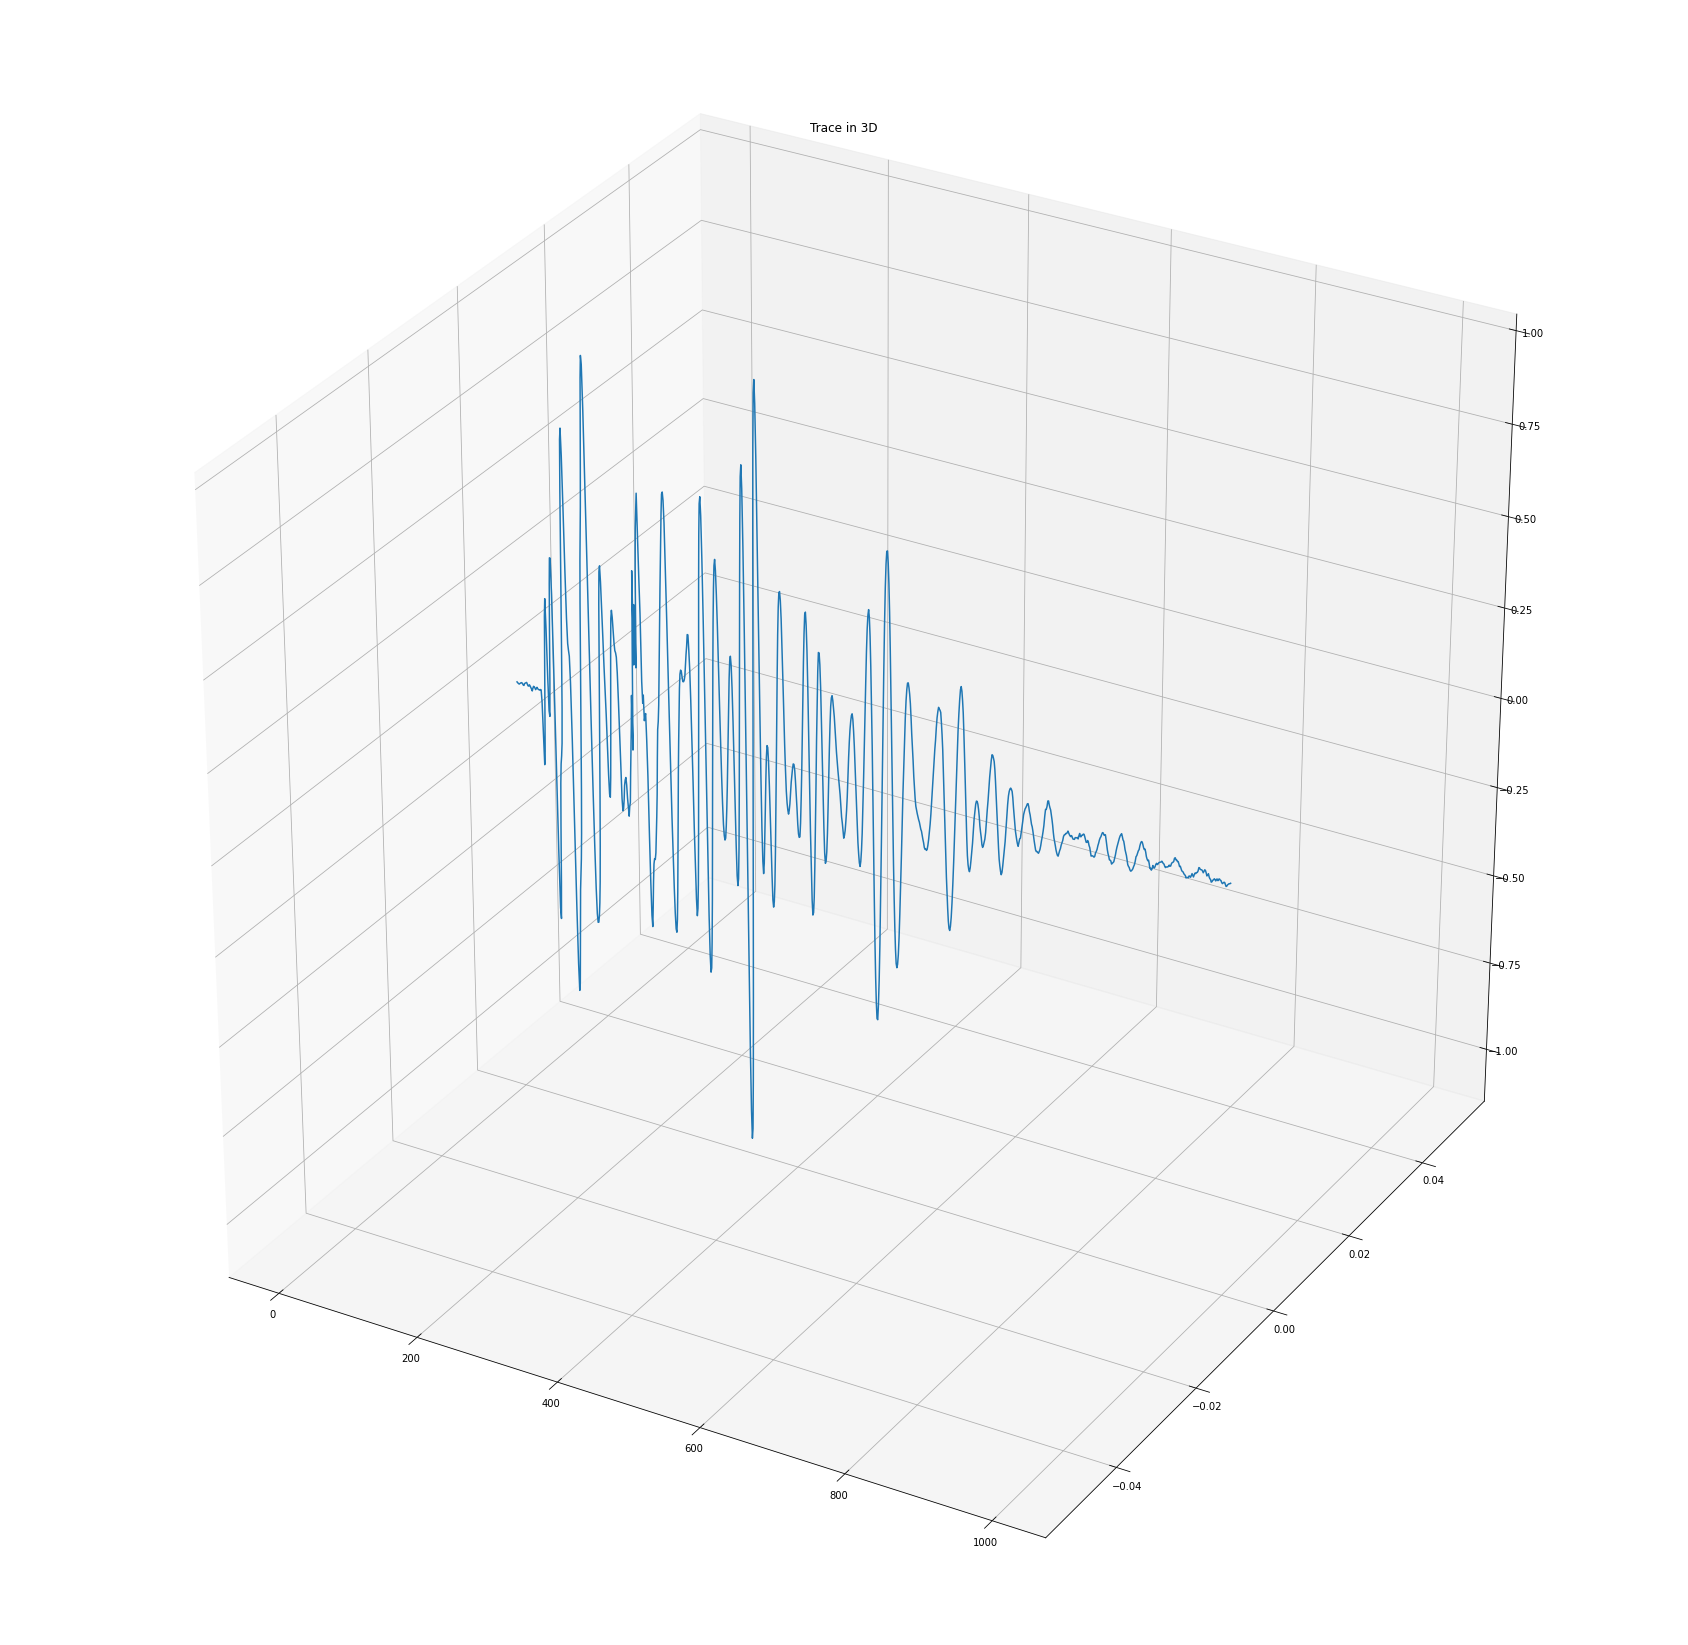

In [ ]:
# Приобразуем к одной амплитуде (-1 до 1)
x_train = trace
for i in range(x_train.shape[0]):
  x_train[i] /= np.max(x_train[i])

# Номер трассы для отображения
trace_num = 200
# x_trace = x_train[trace_num]
# y_trace = range(len(x_train[trace_num]))
# z_trace = np.zeros(len(x_train[trace_num]))

# x_trace = range(len(x_train[trace_num]))
# y_trace =  np.zeros(len(x_train[trace_num]))
# z_trace = x_train[trace_num]

x_trace = [range(len(x_train[trace_num])) for i in range(len(x_train))]
y_trace =  [np.zeros(len(x_train[trace_num])) for i in range(len(x_train))]
z_trace = [x_train[i] for i in range(len(x_train))]


fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.set_title('Trace in 3D')

ax.plot(x_trace[trace_num],
        y_trace[trace_num],
        z_trace[trace_num])

plt.grid()
plt.show()

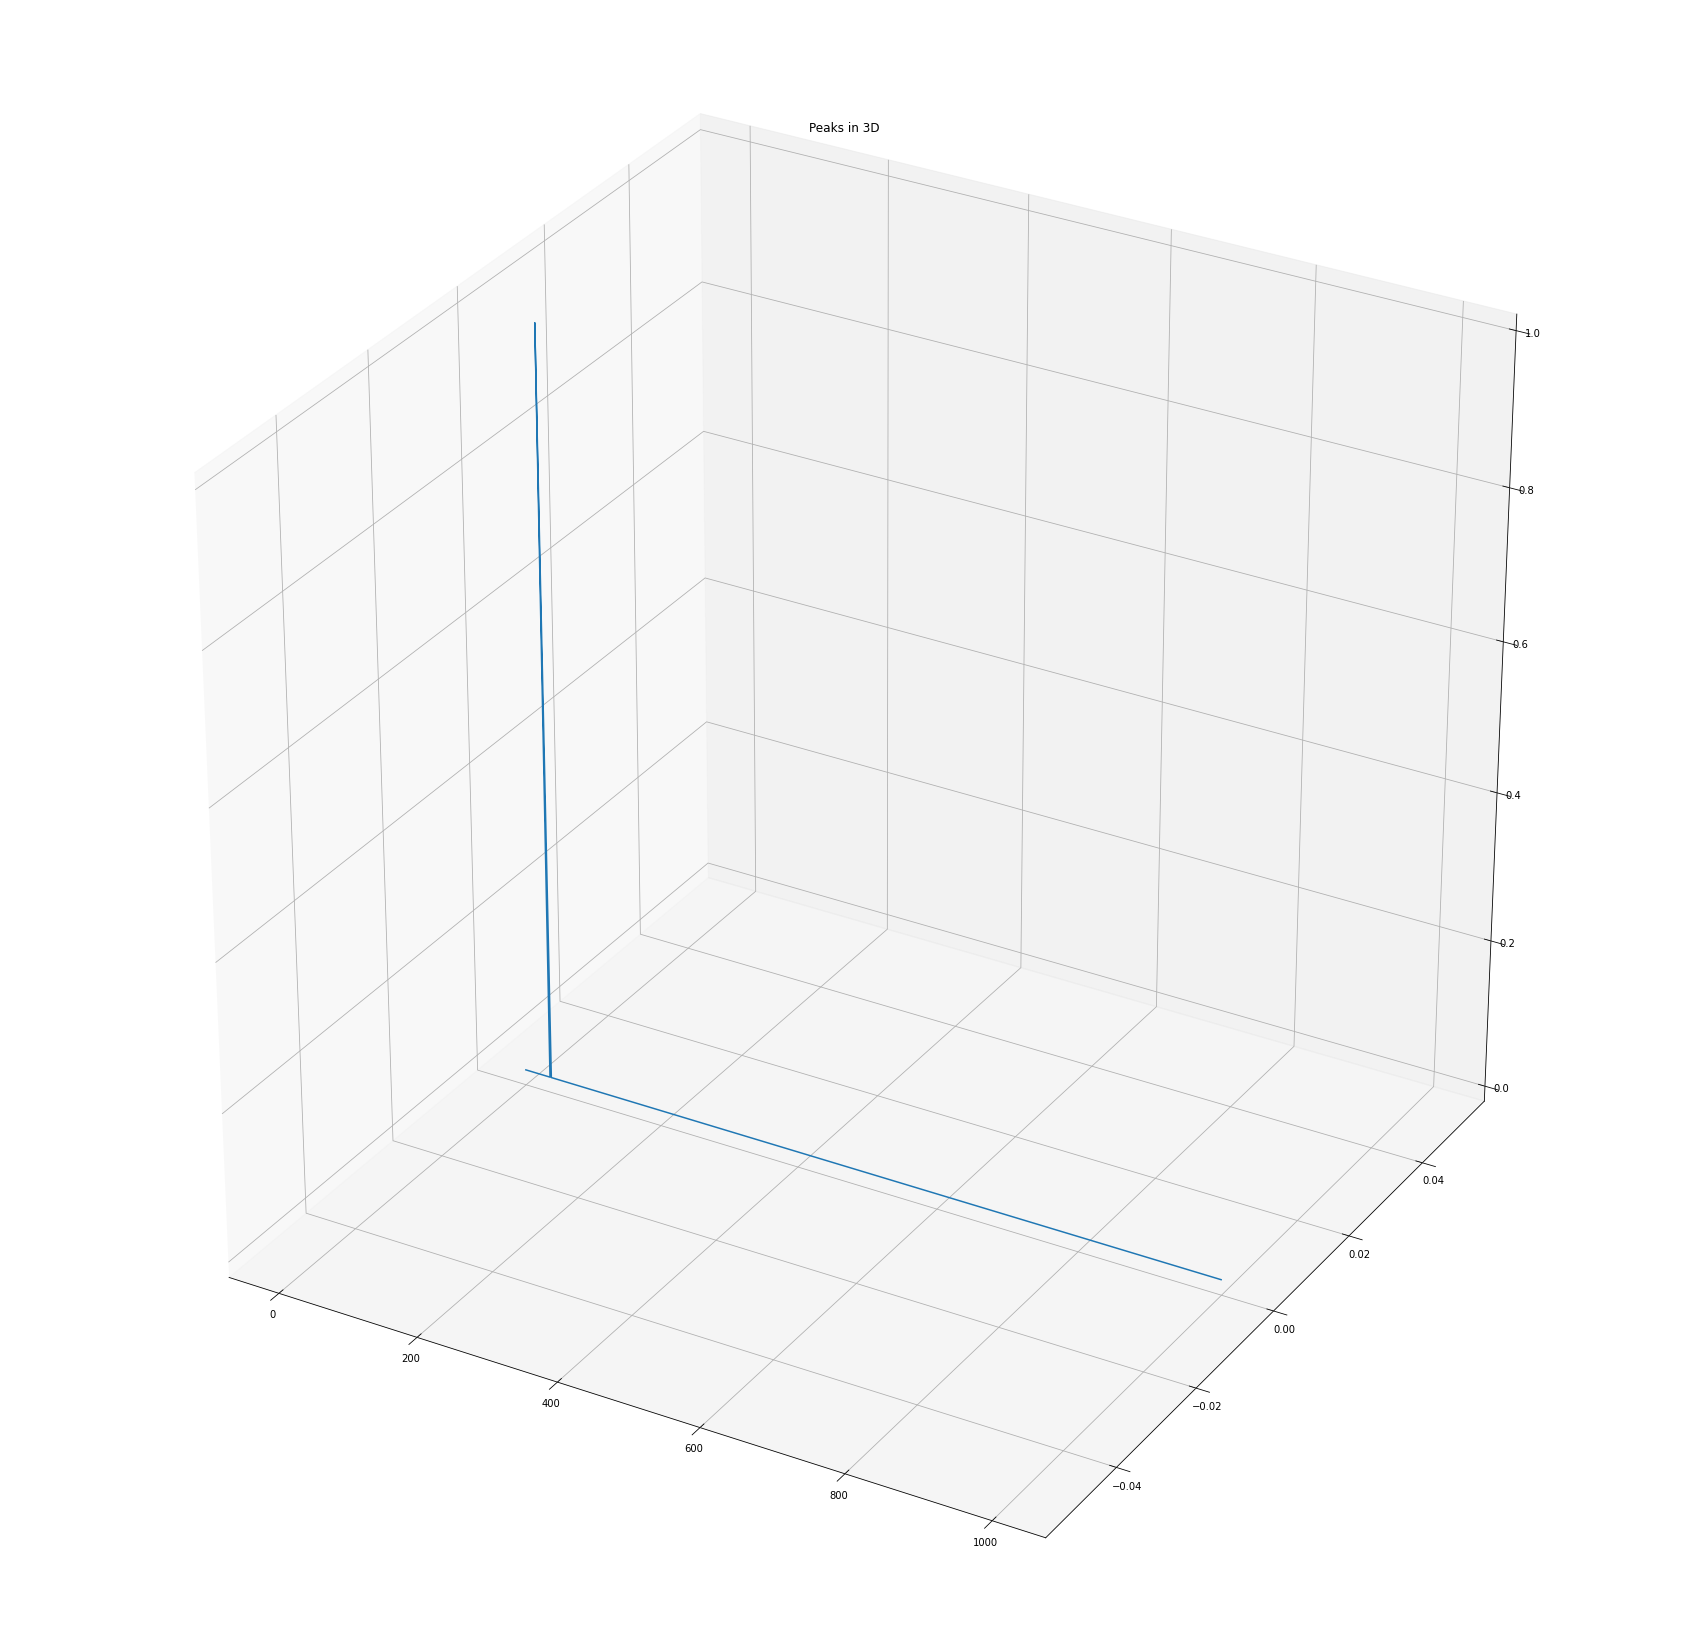

In [ ]:
y_train_categorical = np.zeros((3768,1000))
for i in range(y_train_categorical.shape[0]):
  y_train_categorical[i, int(y_train[i])] = 1

# x_peak = y_train_categorical[trace_num]
# y_peak = range(len(y_train_categorical[trace_num]))
# z_peak = np.zeros(len(y_train_categorical[trace_num]))

# x_peak = range(len(y_train_categorical[trace_num]))
# y_peak = np.zeros(len(y_train_categorical[trace_num]), dtype=int)
# z_peak = y_train_categorical[trace_num]

x_peak = [range(len(y_train_categorical[trace_num])) for i in range(len(y_train_categorical))]
y_peak = [np.zeros(len(y_train_categorical[trace_num]), dtype=int) for i in range(len(y_train_categorical))]
z_peak = [y_train_categorical[i] for i in range(len(y_train_categorical))]


fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.set_title('Peaks in 3D')

ax.plot(x_peak[trace_num],
        y_peak[trace_num],
        z_peak[trace_num])

plt.grid()
plt.show()

In [ ]:
# X_for_train = np.array(list(zip(x_trace, y_trace, z_trace)))
# Y_for_train = np.array(list(zip(x_peak, x_peak, x_peak)))
# X_for_train.shape, Y_for_train.shape

In [ ]:
# split the data with 50% in each set
# X1, X2, y1, y2 = train_test_split(x_train, y_train_categorical, random_state=0,
#                                   train_size=0.3)

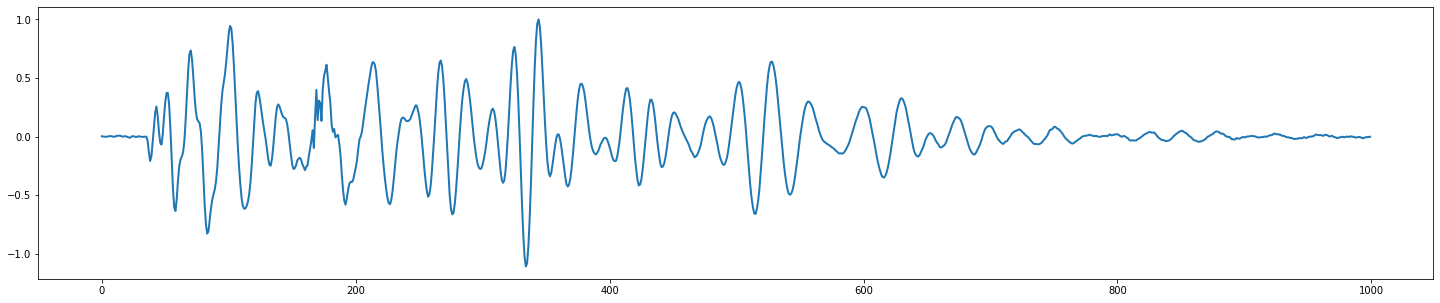

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(range(1000),
         trace[trace_num],
         linewidth = 2)


In [ ]:
trace[0]

array([ 6.95774779e-02,  5.89006506e-02, -3.61168273e-02, -5.25141619e-02,
        1.18742533e-01,  2.03620851e-01,  2.06761703e-01,  6.09798841e-02,
       -4.23530191e-02,  2.11333394e-01,  4.00388807e-01,  5.18202782e-01,
        6.26470268e-01,  5.64199090e-01,  3.60100627e-01,  7.76871443e-02,
       -2.68855598e-02, -1.89349025e-01, -3.73260826e-01, -3.05050492e-01,
       -1.63018540e-01,  9.74747166e-02,  2.63581723e-01,  2.92803407e-01,
        4.58153963e-01,  6.60969973e-01,  8.20560217e-01,  9.32444632e-01,
        9.94520605e-01,  9.94945109e-01,  9.91752684e-01,  1.00000000e+00,
        9.85142052e-01,  9.86685157e-01,  7.77219951e-01,  4.80463713e-01,
        3.27444404e-01,  4.85048406e-02, -1.52003601e-01, -1.75682858e-01,
       -3.19601893e-01, -4.10524756e-01, -3.80867183e-01, -3.73419821e-01,
       -3.80092621e-01, -3.93450350e-01, -4.60516393e-01, -6.21976435e-01,
       -7.57256866e-01, -7.90884554e-01, -7.97740102e-01, -7.80858338e-01,
       -7.36778021e-01, -

In [ ]:
y_train[0]

2.0

In [ ]:
x_train = trace
for i in range(x_train.shape[0]):
  x_train[i] /= np.max(x_train[i])

  # menee = np.where(np.abs(x_train[i]) < 0.05)
  # bolee = np.where(np.abs(x_train[i]) > 0.5)
  # for j in menee:
  #   x_train[i][j] *= 20
  # for j in bolee:
  #   x_train[i][j] /= 20
  #x_train[i] += abs(np.min(x_train[i]))

print(x_train.shape)

x_train = np.expand_dims(trace, -1)
print(x_train.shape)

(3768, 1000)
(3768, 1000, 1)


In [ ]:
y_train_categorical = np.zeros((3768,1000))
for i in range(y_train_categorical.shape[0]):
  y_train_categorical[i, int(y_train[i])] = 1
y_train_categorical.shape

(3768, 1000)

In [ ]:
pass

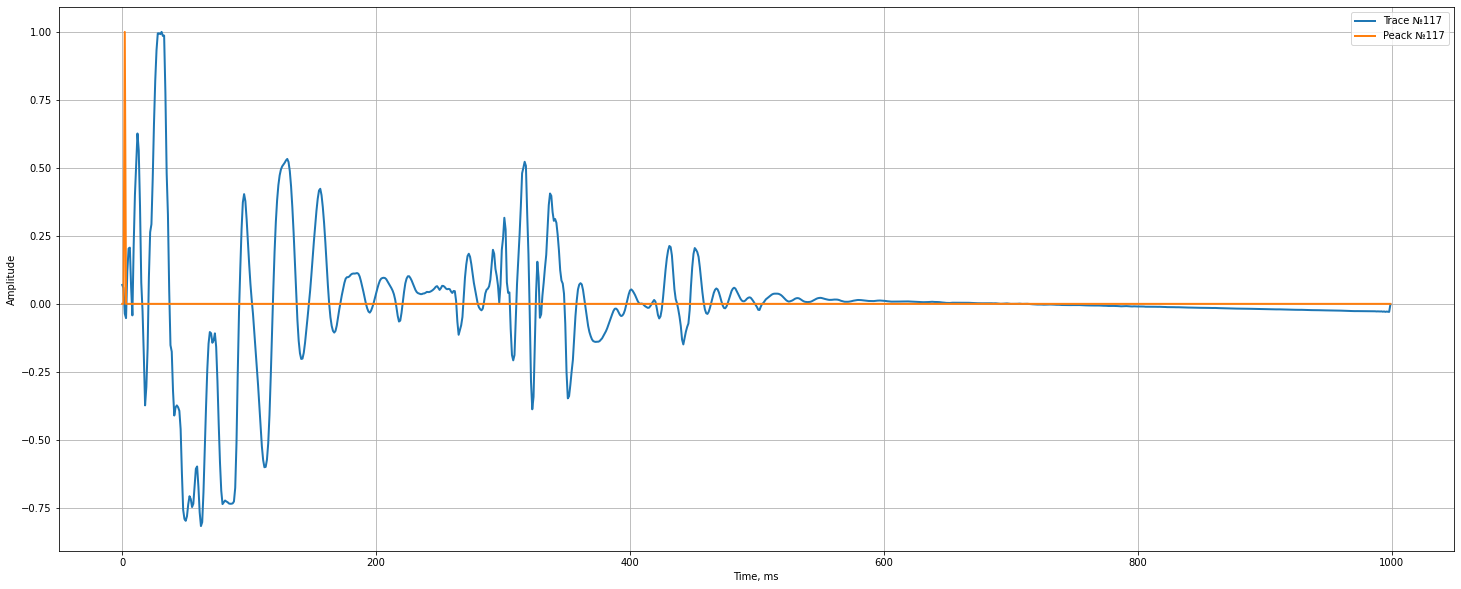

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot(range(1000),
         x_train[0],
         linewidth = 2,
         label='Trace №117')

plt.plot(range(1000),
         y_train_categorical[0],
         linewidth = 2,
         label='Peack №117')

plt.xlabel('Time, ms')
plt.ylabel('Amplitude')

plt.grid()
plt.legend(loc='best')
# plt.savefig('Bad trace №117 result peack.png')
plt.show()

In [ ]:
# x_train, y_train_categorical = utils.shuffle(x_train, y_train_categorical)

test_border = 3000
x_test = x_train[test_border:]
y_test = y_train_categorical[test_border:]

x_train = x_train[:test_border]
y_train_categorical = y_train_categorical[:test_border]

len(x_train), len(y_train_categorical), len(x_test), len(y_test)

(3000, 3000, 768, 768)

In [ ]:
# Tensorflow us es [samples][height][width][channels]
# CNN model
# use_bias=True, bias_initializer=tf.keras.initializers.HeNormal()
def get_model():
    model = keras.models.Sequential([
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None, input_shape=(1000, 1)),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool1D(pool_size=2, strides=2),

        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool1D(pool_size=2, strides=2),

        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.MaxPool1D(pool_size=2, strides=2),

        keras.layers.Conv1D(32, kernel_size=(3), padding='same', use_bias=True, activation=None),
        keras.layers.Activation('relu'),

        keras.layers.Conv1D(32, kernel_size=(3), padding='same', use_bias=True, activation=None),
        keras.layers.Activation('relu'),

        keras.layers.Conv1DTranspose(32, kernel_size=(2), strides=2, padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),

        keras.layers.Conv1DTranspose(32, kernel_size=(2), strides=2, padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),

        keras.layers.Conv1DTranspose(32, kernel_size=(2), strides=2, padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),
        keras.layers.Conv1D(32, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('relu'),

        keras.layers.Conv1D(1, kernel_size=(3), padding='same', activation=None),
        keras.layers.Activation('sigmoid'),

        keras.layers.Flatten(),
    ])
    
    model.compile(optimizer= keras.optimizers.Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1000, 32)          128       
                                                                 
 activation (Activation)     (None, 1000, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1000, 32)          3104      
                                                                 
 activation_1 (Activation)   (None, 1000, 32)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1000, 32)          3104      
                                                                 
 activation_2 (Activation)   (None, 1000, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 32)          0

In [ ]:
epo = 1
history = model.fit(x_train,
                    y_train_categorical,
                    epochs=epo,
                    batch_size = 64,
                    validation_split=0.1
                    )

43/43 [==============================] - 30s 692ms/step - loss: 5.5068 - accuracy: 0.0307 - val_loss: 3.2142 - val_accuracy: 0.1000


In [ ]:
# Code for save model and weights
# cnn `30%
# file_name = '/content/drive/MyDrive/dnn1.h5'
# model_loaded.save(file_name)

# model_loaded = keras.models.load_model(file_name)

# re_train = model_loaded.fit(x_train,
#                     y_train_categorical,
#                     epochs=20,
#                     batch_size = 64,
#                     validation_split=0.2
#                     )
result = model.predict(x_test)

In [ ]:
result = model.predict(x_test)

# keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)
# result = model_loaded.predict(x_test)
# result.shape

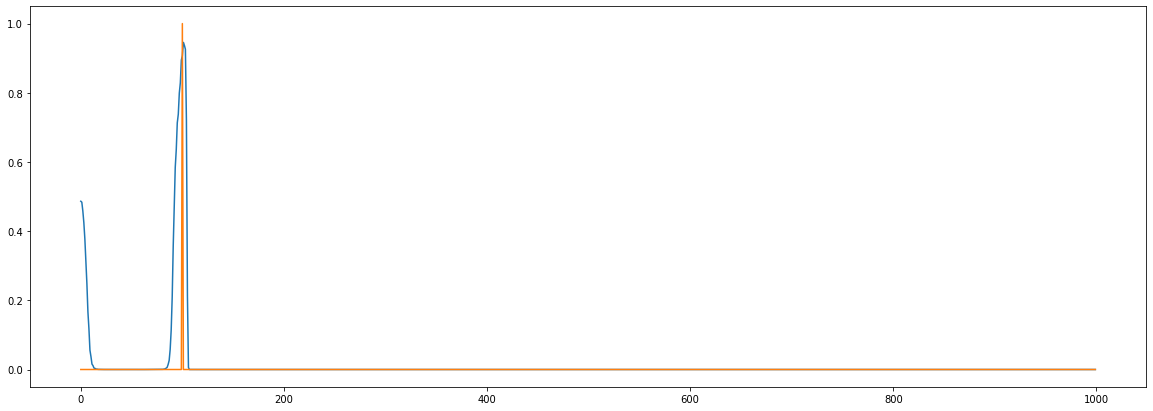

In [ ]:
num_fig = 50
fig = plt.figure(figsize = (20,7))
plt.plot(result[num_fig,:])
plt.plot(y_test[num_fig,:])

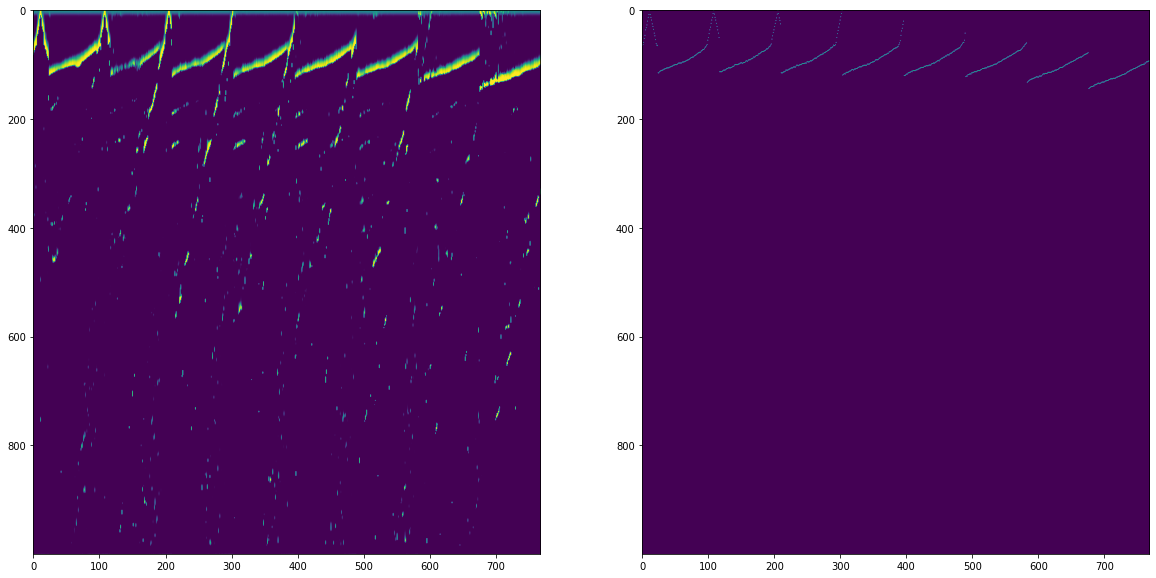

In [ ]:
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

axs_result = axs[0].imshow(result.T, aspect = 'auto')
axs_test = axs[1].imshow(y_test.T, aspect = 'auto')

In [ ]:
x_finally = np.argmax(result, axis=1)
y_finally = np.argmax(y_test, axis=1)
x1 = [i+1 for i in range(len(y_test))]

In [ ]:
compare = np.abs(x_finally - y_finally)
std = np.std(compare)
ms = 2
len(np.where(compare >= ms)[0]), std

(630, 185.53701716777576)

In [ ]:
np.where(compare >= ms)[0]


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  28,
        29,  32,  33,  35,  36,  44,  46,  47,  48,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  87,  88,  89,  90,  91,  92,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126,
       127, 128, 129, 130, 131, 132, 134, 136, 137, 140, 141, 142, 143,
       144, 145, 146, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 204, 207, 208, 209, 210, 211, 212, 21

In [ ]:
len(np.where(compare >= ms)[0])/len(y_test)

0.8203125

In [ ]:
np.mean(compare[np.where(compare <= ms)[0]])

1.2320675105485233

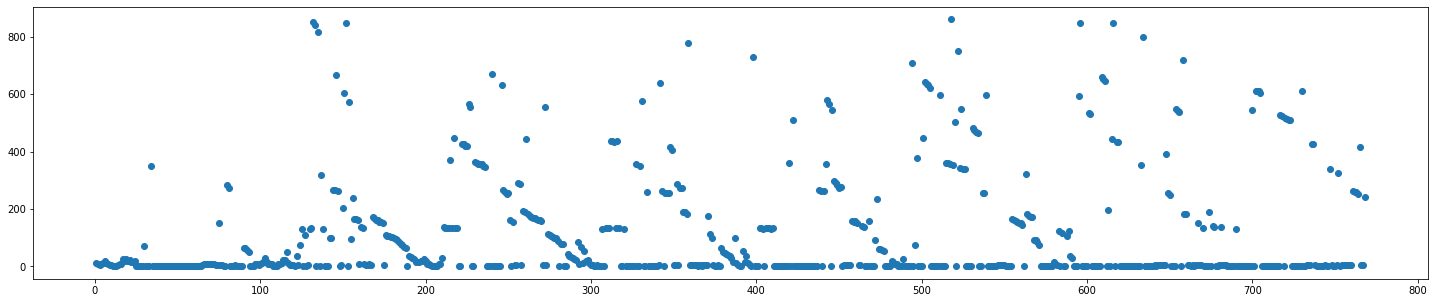

In [ ]:
fig =plt.subplots(figsize=(25,5))
plt.scatter(x1, compare)

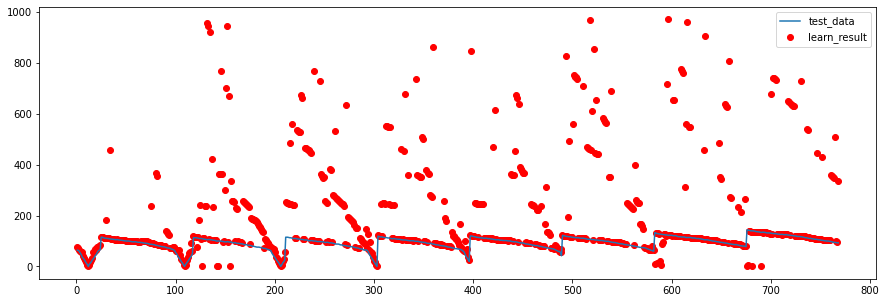

In [ ]:
fig =plt.subplots(figsize=(15,5))
plt.scatter(x1, x_finally, label='learn_result', color='red')
plt.plot(x1, y_finally, label='test_data')
plt.legend()
plt.show()

In [ ]:
# history.history

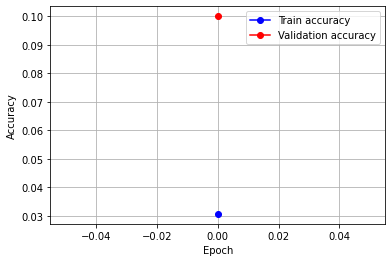

In [ ]:
x = range(epo)

plt.grid(True)

plt.plot(x, 
         history.history['accuracy'], 
         'bo-', 
         label='Train accuracy')

plt.plot(x, 
         history.history['val_accuracy'], 
         'ro-', 
         label='Validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='best')